In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import anderson

In [24]:
file_path = 'Amazon Customer Behavior Survey.csv'
df= pd.read_csv(file_path)

In [25]:
print(df.dtypes)

Timestamp                                 object
age                                        int64
Gender                                    object
Purchase_Frequency                        object
Purchase_Categories                       object
Personalized_Recommendation_Frequency     object
Browsing_Frequency                        object
Product_Search_Method                     object
Search_Result_Exploration                 object
Customer_Reviews_Importance                int64
Add_to_Cart_Browsing                      object
Cart_Completion_Frequency                 object
Cart_Abandonment_Factors                  object
Saveforlater_Frequency                    object
Review_Left                               object
Review_Reliability                        object
Review_Helpfulness                        object
Personalized_Recommendation_Frequency      int64
Recommendation_Helpfulness                object
Rating_Accuracy                            int64
Shopping_Satisfactio

In [26]:
(df.columns)

Index(['Timestamp', 'age', 'Gender', 'Purchase_Frequency',
       'Purchase_Categories', 'Personalized_Recommendation_Frequency',
       'Browsing_Frequency', 'Product_Search_Method',
       'Search_Result_Exploration', 'Customer_Reviews_Importance',
       'Add_to_Cart_Browsing', 'Cart_Completion_Frequency',
       'Cart_Abandonment_Factors', 'Saveforlater_Frequency', 'Review_Left',
       'Review_Reliability', 'Review_Helpfulness',
       'Personalized_Recommendation_Frequency ', 'Recommendation_Helpfulness',
       'Rating_Accuracy ', 'Shopping_Satisfaction', 'Service_Appreciation',
       'Improvement_Areas'],
      dtype='object')

### Statistical Analysis

In [27]:
# Selecting numerical columns
numerical_columns = ['Purchase_Frequency', 'Browsing_Frequency']

# Descriptive statistics for numerical columns
num_stats = df[numerical_columns].describe()

# Printing the descriptive statistics
print("Descriptive Statistics for Numerical Columns:")
print(num_stats)


Descriptive Statistics for Numerical Columns:
       Purchase_Frequency Browsing_Frequency
count                 602                602
unique                  5                  4
top     Few times a month   Few times a week
freq                  203                249


### Normality Test

In [33]:
from scipy.stats import anderson

data_array = df.select_dtypes(include='number').values.flatten()

# Performing Anderson-Darling test
result = anderson(data_array)
print('Anderson-Darling Test for the entire dataset:')
print(f'Statistic: {result.statistic}')
for i in range(len(result.critical_values)):
    sl, cv = result.significance_level[i], result.critical_values[i]
    if result.statistic < cv:
        print(f'At {sl}% level of significance, data is normally distributed (fail to reject H0)')
    else:
        print(f'At {sl}% level of significance, data is not normally distributed (reject H0)')


Anderson-Darling Test for the entire dataset:
Statistic: 551.3278914279636
At 15.0% level of significance, data is not normally distributed (reject H0)
At 10.0% level of significance, data is not normally distributed (reject H0)
At 5.0% level of significance, data is not normally distributed (reject H0)
At 2.5% level of significance, data is not normally distributed (reject H0)
At 1.0% level of significance, data is not normally distributed (reject H0)


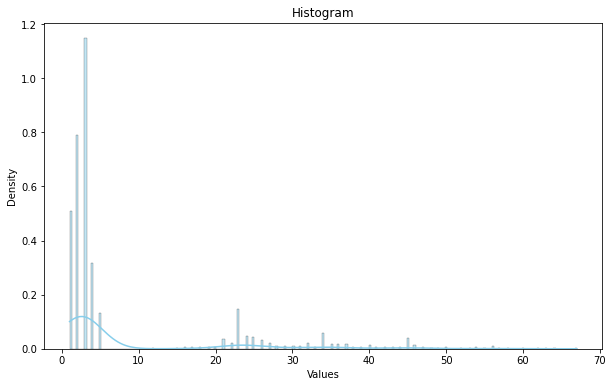

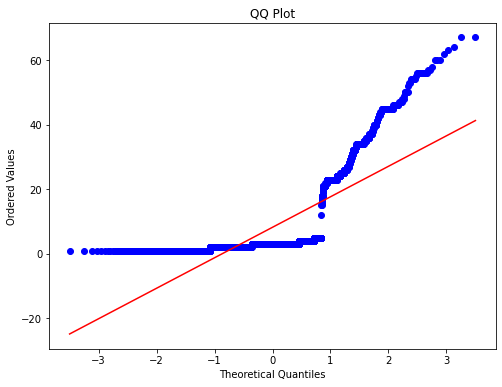

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

data_array = df.select_dtypes(include='number').values.flatten()

# Histogram
plt.figure(figsize=(10, 6))
sns.histplot(data_array, kde=True, color='skyblue', stat='density')
plt.title('Histogram')
plt.xlabel('Values')
plt.ylabel('Density')
plt.show()

# QQ Plot
plt.figure(figsize=(8, 6))
stats.probplot(data_array, dist="norm", plot=plt)
plt.title('QQ Plot')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Ordered Values')
plt.show()


Correlation Matrix:
                                             age  Customer_Reviews_Importance  \
age                                     1.000000                     0.077193   
Customer_Reviews_Importance             0.077193                     1.000000   
Personalized_Recommendation_Frequency  -0.018937                     0.313761   
Rating_Accuracy                        -0.010202                     0.314513   
Shopping_Satisfaction                   0.003934                     0.402317   

                                        Personalized_Recommendation_Frequency   \
age                                                                  -0.018937   
Customer_Reviews_Importance                                           0.313761   
Personalized_Recommendation_Frequency                                 1.000000   
Rating_Accuracy                                                       0.437943   
Shopping_Satisfaction                                                 0.438395   



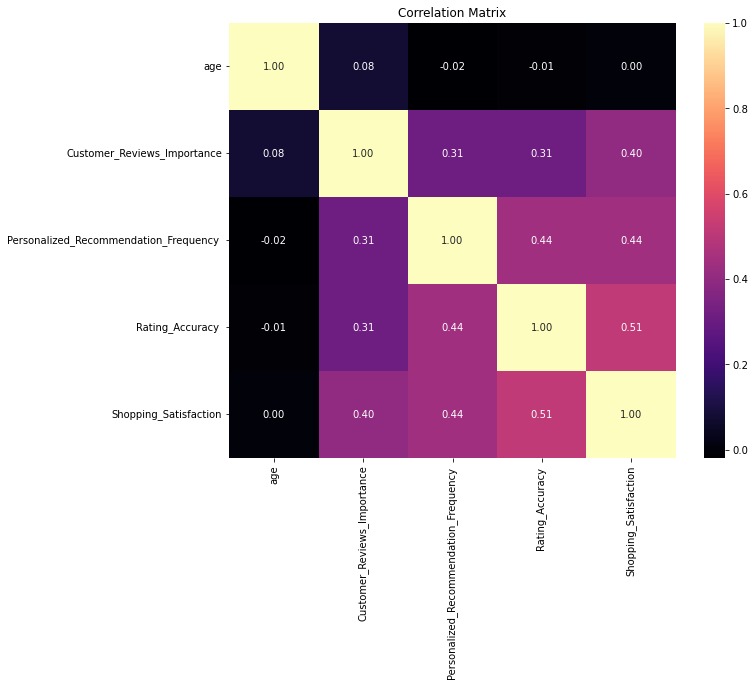

In [14]:
# Perform correlation analysis for each pair of numerical columns
correlation_matrix = df.select_dtypes(include='number').corr()

# the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

# visualizing the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='magma', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


In [67]:
import pandas as pd
import statsmodels.api as sm

# Defining dependent and independent variables
X = df['Rating_Accuracy ']  # Independent variable
y = df['Shopping_Satisfaction']  # Dependent variable

# Add a constant term to the independent variable for the intercept
X = sm.add_constant(X)

# Fitting the linear regression model
model = sm.OLS(y, X).fit()

# Printing the summary of the regression model
print(model.summary())


                              OLS Regression Results                             
Dep. Variable:     Shopping_Satisfaction   R-squared:                       0.264
Model:                               OLS   Adj. R-squared:                  0.263
Method:                    Least Squares   F-statistic:                     215.4
Date:                   Sat, 06 Apr 2024   Prob (F-statistic):           6.84e-42
Time:                           14:02:14   Log-Likelihood:                -768.64
No. Observations:                    602   AIC:                             1541.
Df Residuals:                        600   BIC:                             1550.
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const     

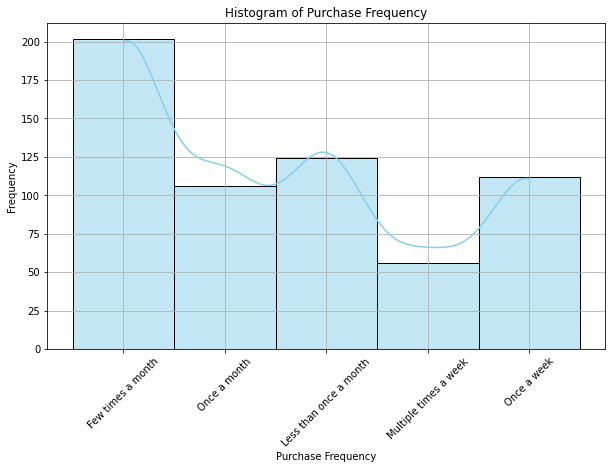

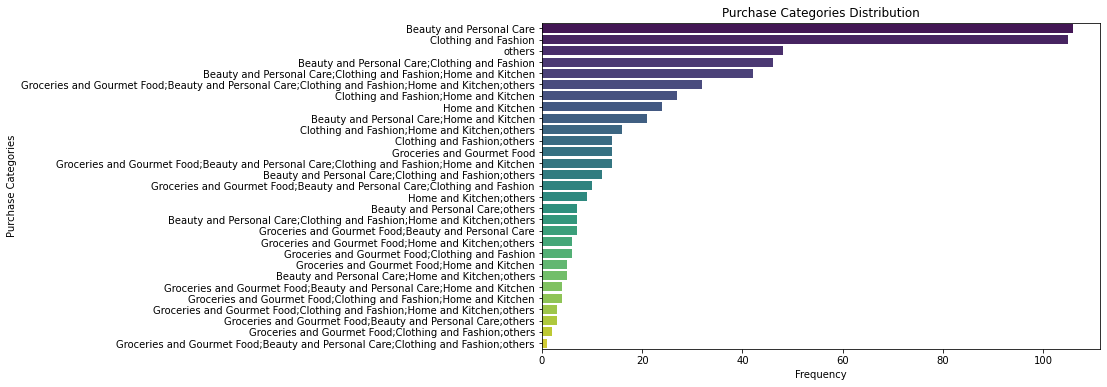

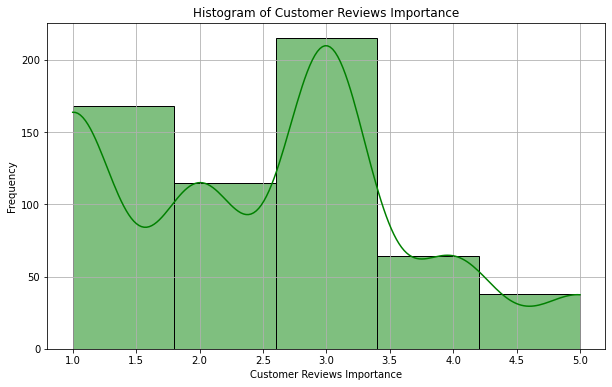

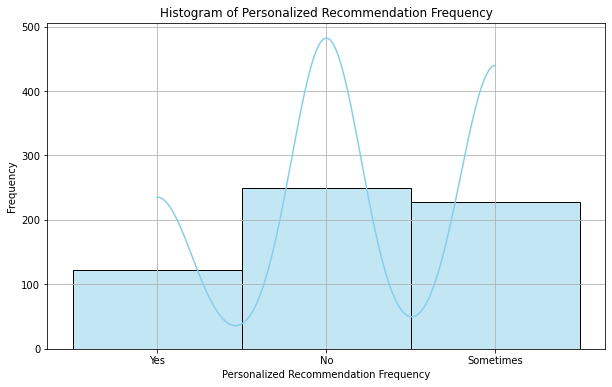

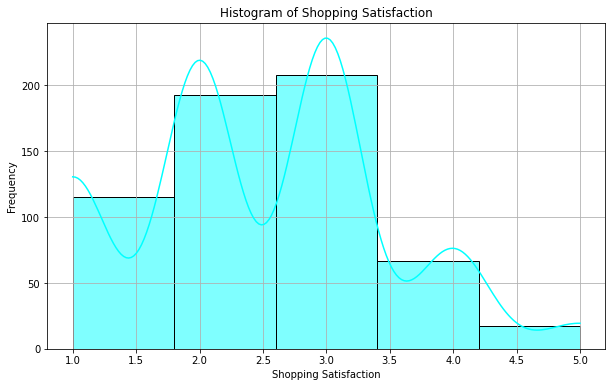

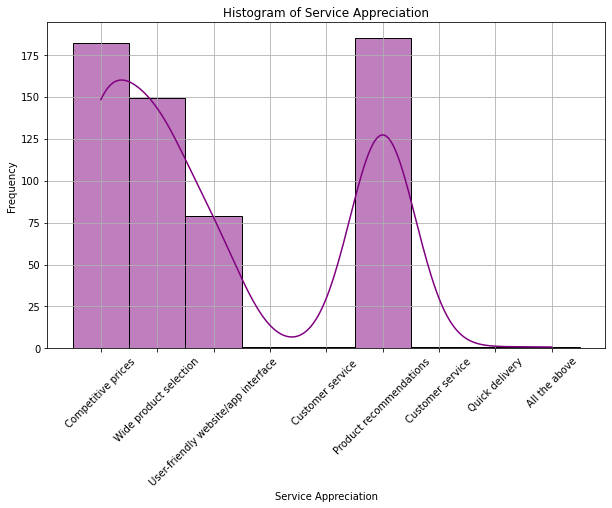

In [80]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('Amazon Customer Behavior Survey.csv')

# Drop irrelevant columns like 'Timestamp'
df.drop(columns=['Timestamp'], inplace=True)

# Remove rows with null values
df.dropna(inplace=True)

# Analyze Purchase Frequency and Purchase Categories
plt.figure(figsize=(10, 6))
sns.histplot(df['Purchase_Frequency'], bins=20, kde=True, color='skyblue', edgecolor='black')
plt.title('Histogram of Purchase Frequency')
plt.xlabel('Purchase Frequency')
plt.xticks(rotation=45) 
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(y='Purchase_Categories', data=df, order=df['Purchase_Categories'].value_counts().index, palette='viridis')
plt.title('Purchase Categories Distribution')
plt.xlabel('Frequency')
plt.ylabel('Purchase Categories')
plt.show()

# Investigate Customer Reviews
plt.figure(figsize=(10, 6))
sns.histplot(df['Customer_Reviews_Importance'], bins=5, kde=True, color='green', edgecolor='black')
plt.title('Histogram of Customer Reviews Importance')
plt.xlabel('Customer Reviews Importance')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Explore Personalized Recommendations
plt.figure(figsize=(10, 6))
sns.histplot(df['Personalized_Recommendation_Frequency'], bins=20, kde=True, color='skyblue', edgecolor='black')
plt.title('Histogram of Personalized Recommendation Frequency')
plt.xlabel('Personalized Recommendation Frequency')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Analyze Shopping Satisfaction and Service Appreciation
plt.figure(figsize=(10, 6))
sns.histplot(df['Shopping_Satisfaction'], bins=5, kde=True, color='cyan', edgecolor='black')
plt.title('Histogram of Shopping Satisfaction')
plt.xlabel('Shopping Satisfaction')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(df['Service_Appreciation'], bins=5, kde=True, color='purple', edgecolor='black')
plt.title('Histogram of Service Appreciation')
plt.xlabel('Service Appreciation')
plt.ylabel('Frequency')
plt.xticks(rotation=45) 
plt.grid(True)
plt.show()


In [12]:
# Analyze the "Improvement_Areas" column to identify common themes or issues
improvement_areas_count = df['Improvement_Areas'].value_counts()

# Print the most common areas for improvement
print("Most Common Areas for Improvement:")
print(improvement_areas_count.head())

Most Common Areas for Improvement:
Customer service responsiveness                                216
Product quality and accuracy                                   159
Reducing packaging waste                                       133
Shipping speed and reliability                                  78
Quality of product is very poor according to the big offers      1
Name: Improvement_Areas, dtype: int64


C:\Users\vino0\AppData\Local\Temp\ipykernel_20932\1522162125.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Purchase_Frequency'] = label_encoder.fit_transform(X['Purchase_Frequency'])
C:\Users\vino0\AppData\Local\Temp\ipykernel_20932\1522162125.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Customer_Reviews_Importance'] = label_encoder.fit_transform(X['Customer_Reviews_Importance'])
C:\Users\vino0\AppData\Local\Temp\ipykernel_20932\1522162125.py:25: SettingWithCopyWarning: 
A value is tryi

Cluster Centers:
[[1.41991342 0.33333333 0.74025974]
 [3.3442623  2.09836066 1.75409836]
 [0.34574468 2.28723404 2.06914894]]

Cluster Counts:
0    231
2    188
1    183
Name: Cluster, dtype: int64


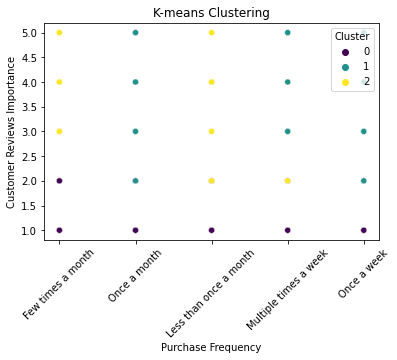

In [20]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans

df = pd.read_csv('Amazon Customer Behavior Survey.csv')

df.drop(columns=['Timestamp'], inplace=True)

# Drop rows with missing values in relevant columns
df_clean = df.dropna(subset=['Purchase_Frequency', 'Customer_Reviews_Importance', 'Shopping_Satisfaction'])

# Convert categorical variables to numerical format
label_encoder = LabelEncoder()
df_clean['Recommendation_Helpfulness'] = label_encoder.fit_transform(df_clean['Recommendation_Helpfulness'])

# Select relevant features for clustering
X = df_clean[['Purchase_Frequency', 'Customer_Reviews_Importance', 'Shopping_Satisfaction']]

# Encode categorical variables
X['Purchase_Frequency'] = label_encoder.fit_transform(X['Purchase_Frequency'])
X['Customer_Reviews_Importance'] = label_encoder.fit_transform(X['Customer_Reviews_Importance'])
X['Shopping_Satisfaction'] = label_encoder.fit_transform(X['Shopping_Satisfaction'])

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Choose the number of clusters (K)
k = 3  # You can choose a different value based on your analysis

# Perform K-means clustering
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X_scaled)

# Add cluster labels to the original DataFrame
df_clean['Cluster'] = kmeans.labels_

# Print cluster centers
print("Cluster Centers:")
print(scaler.inverse_transform(kmeans.cluster_centers_))

# Analyze clusters
cluster_counts = df_clean['Cluster'].value_counts()
print("\nCluster Counts:")
print(cluster_counts)

# Visualize clusters (example)
sns.scatterplot(data=df_clean, x='Purchase_Frequency', y='Customer_Reviews_Importance', hue='Cluster', palette='viridis')
plt.title('K-means Clustering')
plt.xlabel('Purchase Frequency')
plt.xticks(rotation=45) 

plt.ylabel('Customer Reviews Importance')
plt.show()


In [7]:
import pandas as pd
import numpy as np

file_path = 'Amazon Customer Behavior Survey.csv'
df = pd.read_csv(file_path)

# Convert 'Purchase_Frequency' values to numeric
purchase_freq_mapping = {
    'Multiple times a week': 4,
    'Once a week': 1,
    'Few times a month': 0.5,
    'Once a month': 0.25,
    'Less than once a month': 0.1
}
df['Purchase_Frequency'] = df['Purchase_Frequency'].map(purchase_freq_mapping)

# Drop rows with missing Purchase_Frequency values
df = df.dropna(subset=['Purchase_Frequency'])

# Assuming we want to compare 'Purchase_Frequency' between different genders
group1 = df[df['Gender'] == 'Male']['Purchase_Frequency']
group2 = df[df['Gender'] == 'Female']['Purchase_Frequency']

# Calculate observed test statistic
observed_diff = group1.mean() - group2.mean()

# Generate permutations and compute test statistics for permutations
num_permutations = 1000  # Adjust as needed
permuted_diffs = []
for _ in range(num_permutations):
    # Randomly shuffle 'Gender' labels
    shuffled_gender = np.random.permutation(df['Gender'])
    permuted_group1 = df.loc[shuffled_gender == 'Male', 'Purchase_Frequency']
    permuted_group2 = df.loc[shuffled_gender == 'Female', 'Purchase_Frequency']
    permuted_diff = permuted_group1.mean() - permuted_group2.mean()
    permuted_diffs.append(permuted_diff)

# Calculate p-value
p_value = (np.abs(permuted_diffs) >= np.abs(observed_diff)).mean()

# Draw conclusion
alpha = 0.05
if p_value < alpha:
    print("Reject null hypothesis: There is a significant difference in Purchase Frequency between genders.")
else:
    print("Fail to reject null hypothesis: There is no significant difference in Purchase Frequency between genders.")


Reject null hypothesis: There is a significant difference in Purchase Frequency between genders.


In [8]:
gender_purchase_freq = df.groupby('Gender')['Purchase_Frequency'].mean()
print("Mean Purchase Frequency by Gender:")
print(gender_purchase_freq)


age_purchase_freq = df.groupby('age')['Purchase_Frequency'].mean()
print("\nMean Purchase Frequency by Age Group:")
print(age_purchase_freq)


product_purchase_freq = df.groupby('Purchase_Categories')['Purchase_Frequency'].mean()
print("\nMean Purchase Frequency by Purchase Categories:")
print(product_purchase_freq)



Mean Purchase Frequency by Gender:
Gender
Female               0.862074
Male                 0.633451
Others               0.805263
Prefer not to say    0.763483
Name: Purchase_Frequency, dtype: float64

Mean Purchase Frequency by Age Group:
age
3     0.250000
12    4.000000
15    2.125000
16    0.290000
17    0.437500
18    0.642857
19    0.500000
20    2.470000
21    0.726667
22    0.555882
23    0.771951
24    0.392500
25    0.945833
26    0.590741
27    0.605882
28    0.927778
29    1.200000
30    0.918750
31    0.472222
32    0.592105
33    1.642857
34    0.997917
35    0.723333
36    0.612500
37    0.782143
38    0.212500
39    0.237500
40    0.712500
41    1.400000
42    0.462500
43    0.991667
44    0.800000
45    0.950000
46    0.550000
47    0.283333
48    1.533333
49    0.500000
50    1.820000
52    4.000000
53    0.100000
54    1.016667
55    0.500000
56    1.500000
57    0.500000
58    0.250000
60    0.700000
62    0.100000
63    0.100000
64    1.000000
67    0.500000
Name

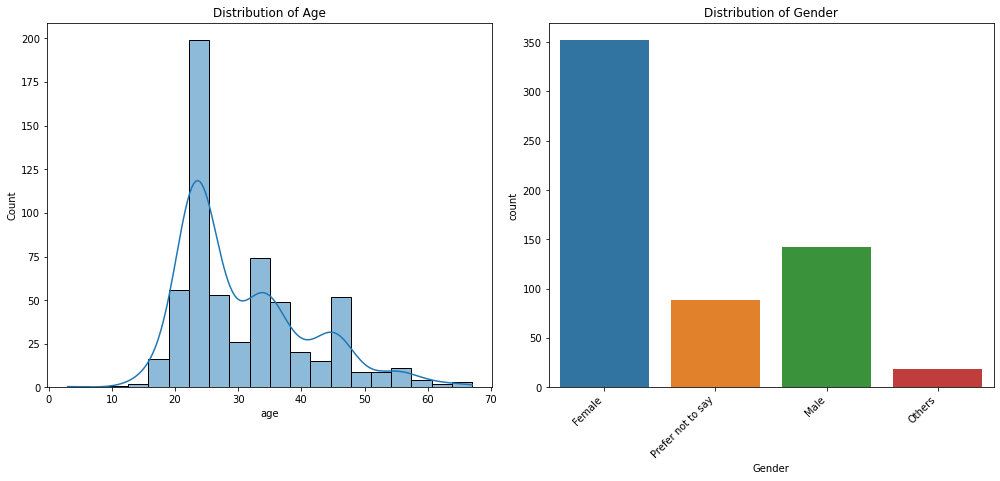

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

file_path = 'Amazon Customer Behavior Survey.csv'  # Replace 'your_dataset.csv' with the actual file path
selected_columns = ['age', 'Gender', 'Purchase_Categories']
df = pd.read_csv(file_path, usecols=selected_columns)

df.dropna(inplace=True)

plt.figure(figsize=(14, 12))  # Increased figure size

# Histogram for age
plt.subplot(2, 2, 1)
sns.histplot(df['age'], bins=20, kde=True)
plt.title('Distribution of Age')

# Bar plot for Gender
plt.subplot(2, 2, 2)
sns.countplot(x='Gender', data=df)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels diagonally
plt.title('Distribution of Gender')

plt.tight_layout()
plt.show()


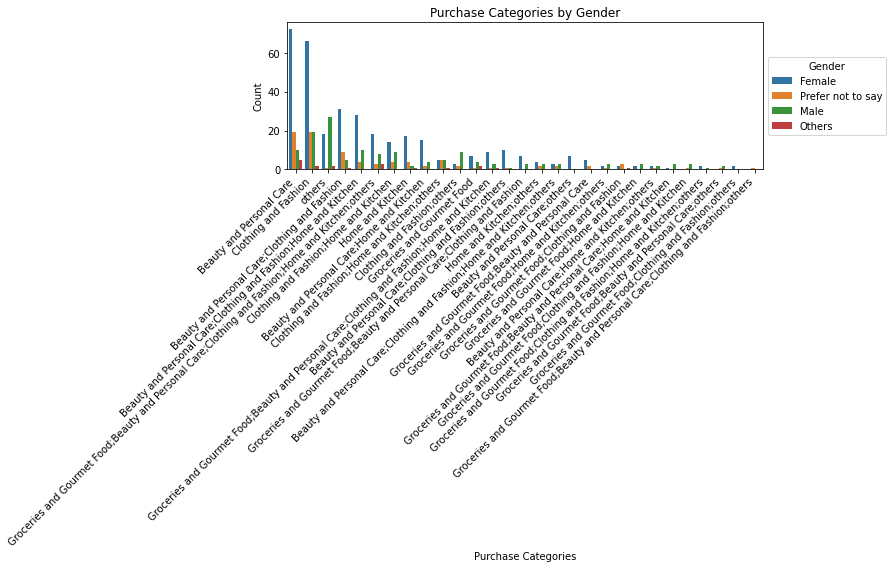

In [25]:
# Increase the figure size
plt.figure(figsize=(12, 8))

# Grouped bar plot for Purchase Categories by Gender
ax = sns.countplot(x='Purchase_Categories', hue='Gender', data=df, order=df['Purchase_Categories'].value_counts().index)
plt.title('Purchase Categories by Gender')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels diagonally
plt.xlabel('Purchase Categories')
plt.ylabel('Count')
plt.legend(title='Gender', loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.show()


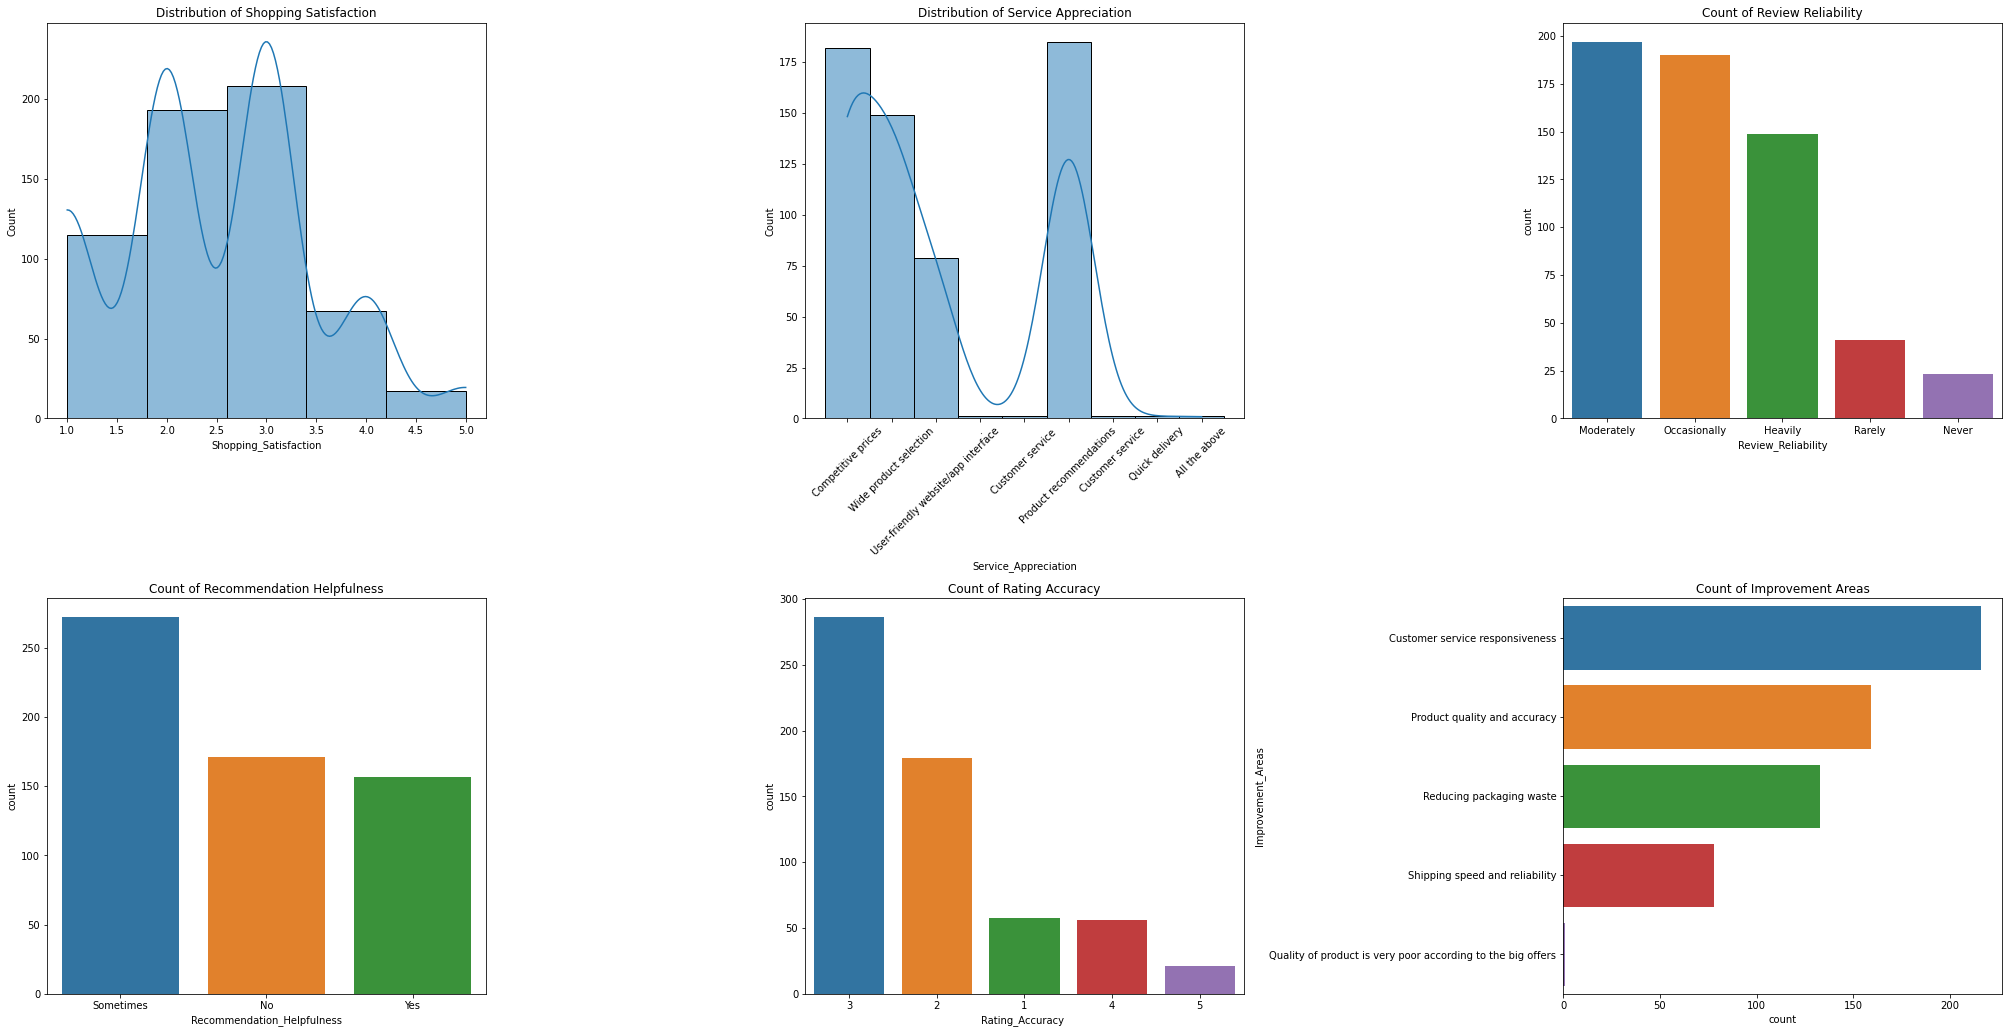

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Loading the relevant columns from the dataset
file_path = 'Amazon Customer Behavior Survey.csv'
selected_columns = ['Timestamp', 'Product_Search_Method', 'Search_Result_Exploration',
                    'Review_Left', 'Review_Reliability', 'Recommendation_Helpfulness',
                    'Rating_Accuracy ', 'Shopping_Satisfaction', 'Service_Appreciation',
                    'Improvement_Areas']
df = pd.read_csv(file_path, usecols=selected_columns)

df.dropna(inplace=True)

plt.figure(figsize=(28, 22))

# Histogram for Shopping Satisfaction
plt.subplot(3, 3, 1)
sns.histplot(df['Shopping_Satisfaction'], bins=5, kde=True)
plt.title('Distribution of Shopping Satisfaction')

# Histogram for Service Appreciation
plt.subplot(3, 3, 2)
sns.histplot(df['Service_Appreciation'], bins=5, kde=True)
plt.xticks(rotation=45)
plt.title('Distribution of Service Appreciation')

# Count plot for Review Reliability
plt.subplot(3, 3, 3)
sns.countplot(x='Review_Reliability', data=df, order=df['Review_Reliability'].value_counts().index)
plt.title('Count of Review Reliability')

# Count plot for Recommendation Helpfulness
plt.subplot(3, 3, 4)
sns.countplot(x='Recommendation_Helpfulness', data=df, order=df['Recommendation_Helpfulness'].value_counts().index)
plt.title('Count of Recommendation Helpfulness')

# Count plot for Rating Accuracy
plt.subplot(3, 3, 5)
sns.countplot(x='Rating_Accuracy ', data=df, order=df['Rating_Accuracy '].value_counts().index)
plt.title('Count of Rating Accuracy')

# Count plot for Improvement Areas
plt.subplot(3, 3, 6)
sns.countplot(y='Improvement_Areas', data=df, order=df['Improvement_Areas'].value_counts().index[:5])
plt.title('Count of Improvement Areas')

plt.tight_layout()
plt.show()


In [42]:
import pandas as pd
from textblob import TextBlob  # For sentiment analysis

# Load the dataset
file_path = 'Amazon Customer Behavior Survey.csv'
df = pd.read_csv(file_path)

# Replace non-numeric values in 'Cart_Abandonment_Factors' with NaN
df['Cart_Abandonment_Factors'] = pd.to_numeric(df['Cart_Abandonment_Factors'], errors='coerce')

# Filling NaN values with 0
df['Cart_Abandonment_Factors'].fillna(0, inplace=True)

print(df.head())


                        Timestamp  age             Gender  \
0  2023/06/04 1:28:19 PM GMT+5:30   23             Female   
1  2023/06/04 2:30:44 PM GMT+5:30   23             Female   
2  2023/06/04 5:04:56 PM GMT+5:30   24  Prefer not to say   
3  2023/06/04 5:13:00 PM GMT+5:30   24             Female   
4  2023/06/04 5:28:06 PM GMT+5:30   22             Female   

       Purchase_Frequency                                Purchase_Categories  \
0       Few times a month                           Beauty and Personal Care   
1            Once a month                               Clothing and Fashion   
2       Few times a month    Groceries and Gourmet Food;Clothing and Fashion   
3            Once a month  Beauty and Personal Care;Clothing and Fashion;...   
4  Less than once a month      Beauty and Personal Care;Clothing and Fashion   

  Personalized_Recommendation_Frequency Browsing_Frequency  \
0                                   Yes   Few times a week   
1                           

In [20]:
import pandas as pd

# defining the age groups 
age_bins = [0, 18, 35, 55, float('inf')]
age_labels = ['Under 18', '18-35', '36-55', '56+']

# Creating a new column for age group
df['Age_Group'] = pd.cut(df['age'], bins=age_bins, labels=age_labels, right=False)

print(df.head())


                        Timestamp  age             Gender  \
0  2023/06/04 1:28:19 PM GMT+5:30   23             Female   
1  2023/06/04 2:30:44 PM GMT+5:30   23             Female   
2  2023/06/04 5:04:56 PM GMT+5:30   24  Prefer not to say   
3  2023/06/04 5:13:00 PM GMT+5:30   24             Female   
4  2023/06/04 5:28:06 PM GMT+5:30   22             Female   

       Purchase_Frequency                                Purchase_Categories  \
0       Few times a month                           Beauty and Personal Care   
1            Once a month                               Clothing and Fashion   
2       Few times a month    Groceries and Gourmet Food;Clothing and Fashion   
3            Once a month  Beauty and Personal Care;Clothing and Fashion;...   
4  Less than once a month      Beauty and Personal Care;Clothing and Fashion   

  Personalized_Recommendation_Frequency Browsing_Frequency  \
0                                   Yes   Few times a week   
1                           

In [21]:
import pandas as pd

# Grouping by age group and purchase category, then count occurrences
purchase_category_counts = df.groupby(['Age_Group', 'Purchase_Categories']).size().reset_index(name='Purchase_Count')

# Finding the most popular purchase category within each age group
most_popular_categories = purchase_category_counts.loc[purchase_category_counts.groupby('Age_Group')['Purchase_Count'].idxmax()]

# Finding the age group with the maximum number of purchases
max_shopping_age_group = most_popular_categories.loc[most_popular_categories['Purchase_Count'].idxmax()]['Age_Group']

print("Most popular purchase categories within each age group:")
print(most_popular_categories)
print("\nAge group with the maximum number of purchases:", max_shopping_age_group)


Most popular purchase categories within each age group:
   Age_Group          Purchase_Categories  Purchase_Count
11  Under 18  Clothing and Fashion;others               4
37     18-35         Clothing and Fashion              83
58     36-55     Beauty and Personal Care              23
87       56+     Beauty and Personal Care               5

Age group with the maximum number of purchases: 18-35


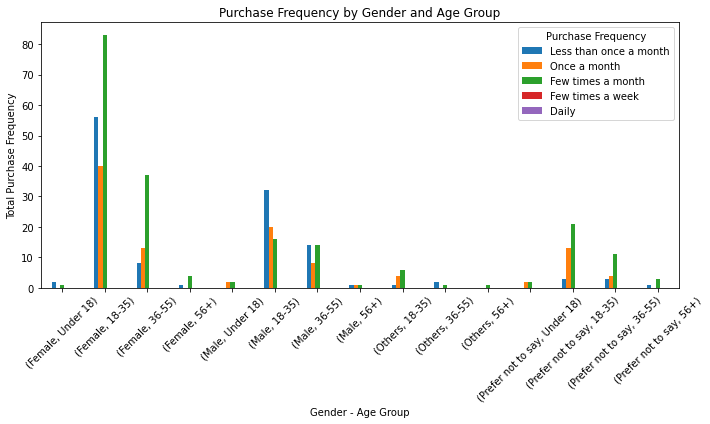

Maximum shopping by gender in each age category:
Less than once a month       (Female, 18-35)
Once a month                 (Female, 18-35)
Few times a month            (Female, 18-35)
Few times a week          (Female, Under 18)
Daily                     (Female, Under 18)
dtype: object


In [22]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert Purchase_Frequency to categorical type for proper ordering
purchase_frequency_order = ['Less than once a month', 'Once a month', 'Few times a month', 'Few times a week', 'Daily']
df['Purchase_Frequency'] = pd.Categorical(df['Purchase_Frequency'], categories=purchase_frequency_order, ordered=True)

# Group by Gender and Age_Group, then calculate the total Purchase_Frequency
purchase_freq_by_gender_age = df.groupby(['Gender', 'Age_Group'])['Purchase_Frequency'].value_counts().unstack(fill_value=0)

# Plotting
purchase_freq_by_gender_age.plot(kind='bar', figsize=(10, 6))
plt.title('Purchase Frequency by Gender and Age Group')
plt.xlabel('Gender - Age Group')
plt.ylabel('Total Purchase Frequency')
plt.xticks(rotation=45)
plt.legend(title='Purchase Frequency')
plt.tight_layout()
plt.show()

# To Determine which gender in each age category has the maximum shopping
max_shopping_gender_age = purchase_freq_by_gender_age.idxmax(axis=0)
print("Maximum shopping by gender in each age category:")
print(max_shopping_gender_age)